In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
dataset = pd.read_excel("DataSet.xlsx",)


In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,Power,Energy,ElectMG,HeatT,SSA,IDIG,Nconcentration,Oconcentration,Pconcentration,Bconcentration,Porosity,Pore volume (cm3/g),PreparationMG,ElectrolyteType,Electrolyteconcentration,Normalized ScanRate,AbsolutePotentialWindow,Separator,CurrentCollector,SaltAnionVolume,SaltCationVolume,SolventDipoleMoment,SolventVolume,Binder conc
0,20280.525000,6.525000,Activated Carbon,600,943.0,1.15,0.0,9.0,0.0,0.0,0.498596,0.44,Thermal activation,Aqueous,6.0,1.0,0.9,No Separator,Ni,18.01,40.59,1.85,19.61,5.0
1,14887.134375,7.509375,Activated Carbon,700,1177.0,1.27,0.0,9.0,0.0,0.0,0.554169,0.55,Thermal activation,Aqueous,6.0,1.0,0.9,No Separator,Ni,18.01,40.59,1.85,19.61,5.0
2,9185.550000,8.550000,Activated Carbon,800,1733.0,1.38,0.0,9.0,0.0,0.0,0.660280,0.86,Thermal activation,Aqueous,6.0,1.0,0.9,No Separator,Ni,18.01,40.59,1.85,19.61,5.0
3,27214.884375,5.259375,Activated Carbon,900,1841.0,1.78,0.0,9.0,0.0,0.0,0.703528,1.05,Thermal activation,Aqueous,6.0,1.0,0.9,No Separator,Ni,18.01,40.59,1.85,19.61,5.0
4,24595.237500,5.737500,Activated Carbon,1000,1554.0,2.35,0.0,9.0,0.0,0.0,0.679939,0.94,Thermal activation,Aqueous,6.0,1.0,0.9,No Separator,Ni,18.01,40.59,1.85,19.61,5.0


In [4]:
data= dataset.drop(['ElectMG','ElectrolyteType','Separator','PreparationMG','Power'], axis=1)
data=data[data.Energy<70]
data=data[data.Porosity<70]

In [5]:
X = data.drop("Energy",axis=1)   #Feature Matrix
y = data["Energy"]

In [6]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1269, 18), (544, 18))

In [7]:
X_train.corr()

,HeatT,SSA,IDIG,Nconcentration,Oconcentration,Pconcentration,Bconcentration,Porosity,Pore volume (cm3/g),Electrolyteconcentration,Normalized ScanRate,AbsolutePotentialWindow,SaltAnionVolume,SaltCationVolume,SolventDipoleMoment,SolventVolume,Binder conc
HeatT,1.000000,0.056962,-0.010890,0.199154,-0.113519,-0.143552,0.043484,-0.270690,-0.195149,-0.009624,-0.077264,-0.219349,-0.275387,-0.275536,-0.292403,-0.273200,0.108445
SSA,0.056962,1.000000,0.336645,-0.185406,0.021218,-0.079813,-0.030125,0.525709,-0.102028,-0.132317,-0.034547,0.074314,0.223641,0.209229,0.082084,0.162250,-0.077782
IDIG,-0.010890,0.336645,1.000000,-0.103724,-0.114865,0.002337,-0.006723,0.221309,0.004914,-0.197705,-0.047478,-0.045655,-0.066485,-0.050004,-0.098365,-0.074052,-0.179988
Nconcentration,0.199154,-0.185406,-0.103724,1.000000,-0.163789,-0.062074,-0.046217,-0.215906,-0.074604,-0.100808,-0.096973,-0.201605,-0.176608,-0.243580,-0.167118,-0.206884,-0.093877
Oconcentration,-0.113519,0.021218,-0.114865,-0.163789,1.000000,0.032098,0.163967,-0.124580,0.012936,-0.039075,0.006077,-0.071784,-0.052468,-0.035259,-0.003504,0.013196,0.077973
Pconcentration,-0.143552,-0.079813,0.002337,-0.062074,0.032098,1.000000,-0.011708,0.225420,0.845669,-0.097680,-0.036654,-0.084490,-0.023756,-0.090903,-0.027571,-0.000685,-0.079757
Bconcentration,0.043484,-0.030125,-0.006723,-0.046217,0.163967,-0.011708,1.000000,0.034087,-0.011136,0.066649,-0.039782,-0.045760,-0.055412,-0.042731,-0.049461,-0.053901,0.004607
Porosity,-0.270690,0.525709,0.221309,-0.215906,-0.124580,0.225420,0.034087,1.000000,0.309603,0.116551,0.022263,0.124993,0.147896,0.209210,0.143925,0.165544,-0.075163
Pore volume (cm3/g),-0.195149,-0.102028,0.004914,-0.074604,0.012936,0.845669,-0.011136,0.309603,1.000000,-0.146145,-0.053621,-0.086721,-0.005667,-0.096708,-0.024839,-0.000476,-0.126461
Electrolyteconcentration,-0.009624,-0.132317,-0.197705,-0.100808,-0.039075,-0.097680,0.066649,0.116551,-0.146145,1.000000,0.128591,-0.029265,-0.279924,0.004343,-0.027112,-0.115255,0.340878


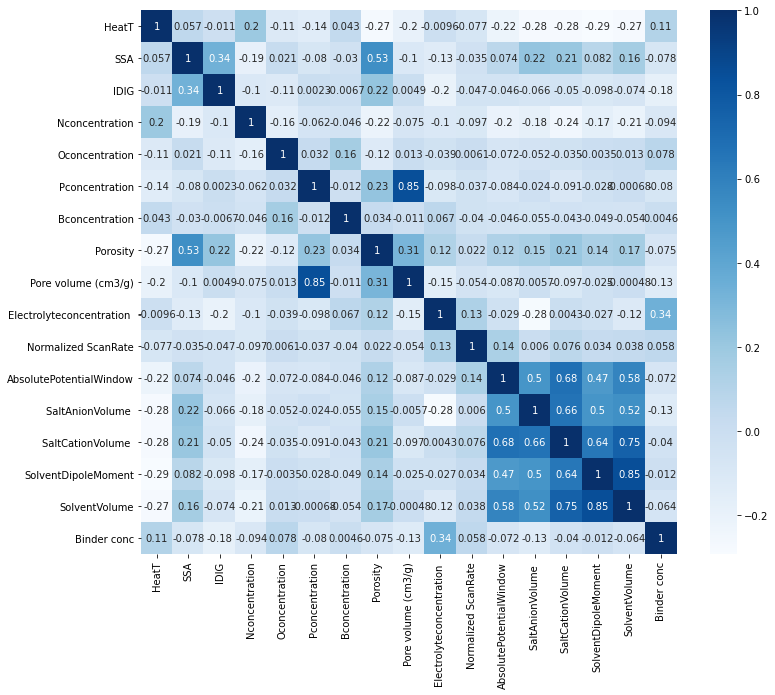

In [8]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [9]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(X_train, 0.65)
len(set(corr_features))

3

In [11]:
corr_features

{'Pore volume (cm3/g)', 'SaltCationVolume ', 'SolventVolume'}